In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn=pd.read_csv('customer_churn_data.csv')
churn.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df=pd.DataFrame(data=churn)
df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [5]:
df.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

In [7]:
df.shape

(3333, 21)

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('bool'): Index(['churn'], dtype='object'),
 dtype('int64'): Index(['account_length', 'area_code', 'number_vmail_messages',
        'total_day_calls', 'total_eve_calls', 'total_night_calls',
        'total_intl_calls', 'customer_service_calls'],
       dtype='object'),
 dtype('float64'): Index(['total_day_minutes', 'total_day_charge', 'total_eve_minutes',
        'total_eve_charge', 'total_night_minutes', 'total_night_charge',
        'total_intl_minutes', 'total_intl_charge'],
       dtype='object'),
 dtype('O'): Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')}

In [9]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1fb0ff54c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb0ff54dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb0ff54448>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb0ff62f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb0ff67b08>],
 'means': []}

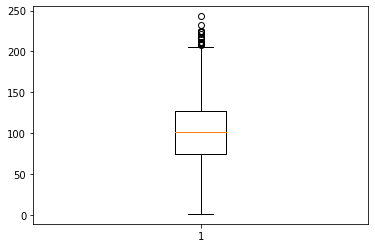

In [10]:
plt.boxplot(df['account_length'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x145955efa08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x145955e8c08>,
 'cmins': <matplotlib.collections.LineCollection at 0x145955efec8>,
 'cbars': <matplotlib.collections.LineCollection at 0x145955ef888>}

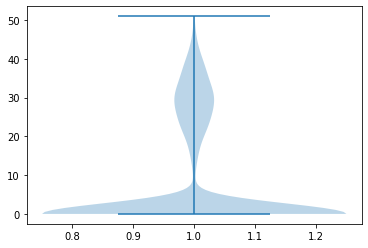

In [38]:
plt.violinplot(df['number_vmail_messages'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x14595657208>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x145956578c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1459565e908>,
 'cbars': <matplotlib.collections.LineCollection at 0x1459565e948>}

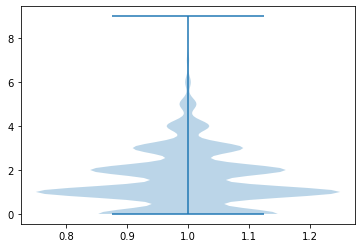

In [39]:
plt.violinplot(df['customer_service_calls'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x145956b2f08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x145956ba608>,
 'cmins': <matplotlib.collections.LineCollection at 0x145956c2e88>,
 'cbars': <matplotlib.collections.LineCollection at 0x145956c2608>}

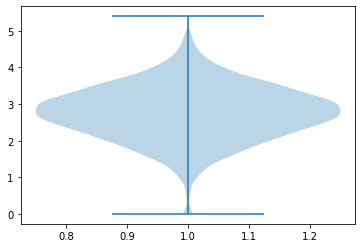

In [40]:
plt.violinplot(df['total_intl_charge'])

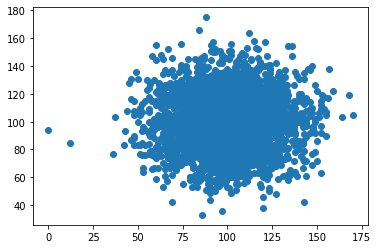

In [42]:
plt.scatter('total_eve_calls','total_night_calls',data=df)

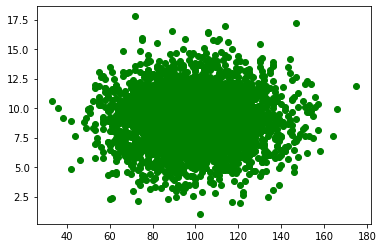

In [43]:
plt.scatter('total_night_calls','total_night_charge',color='g',data=df)

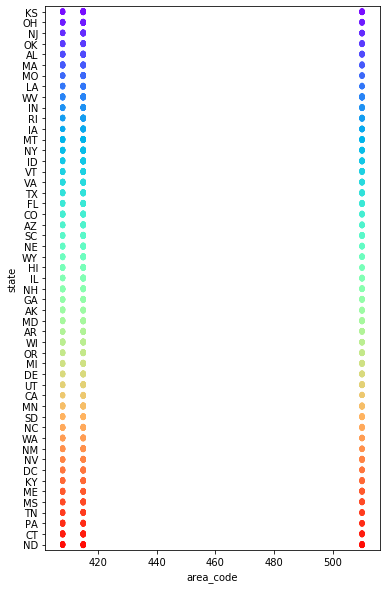

In [47]:
plt.figure(figsize=(6,10))
sns.stripplot('area_code','state',data=df,palette='rainbow')

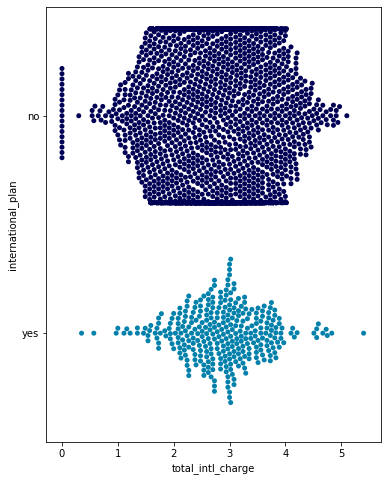

In [49]:
plt.figure(figsize=(6,8))
sns.swarmplot('total_intl_charge','international_plan',data=df,palette='ocean')

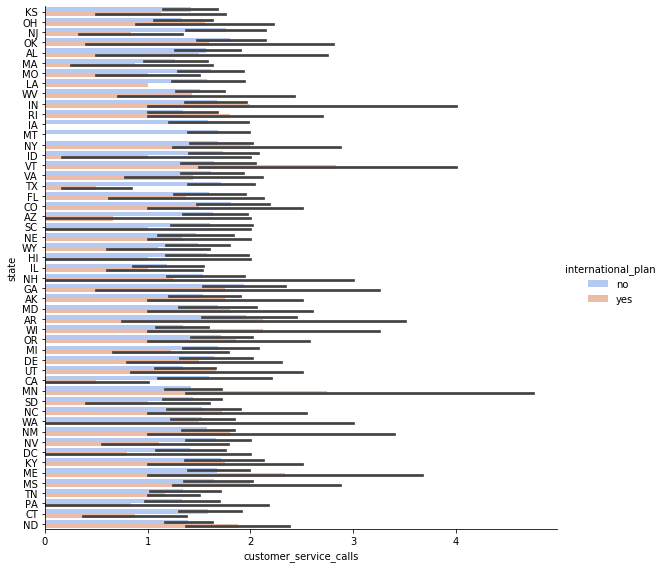

In [52]:
sns.catplot('customer_service_calls','state',hue='international_plan',height=8,data=df,palette='coolwarm',kind='bar')

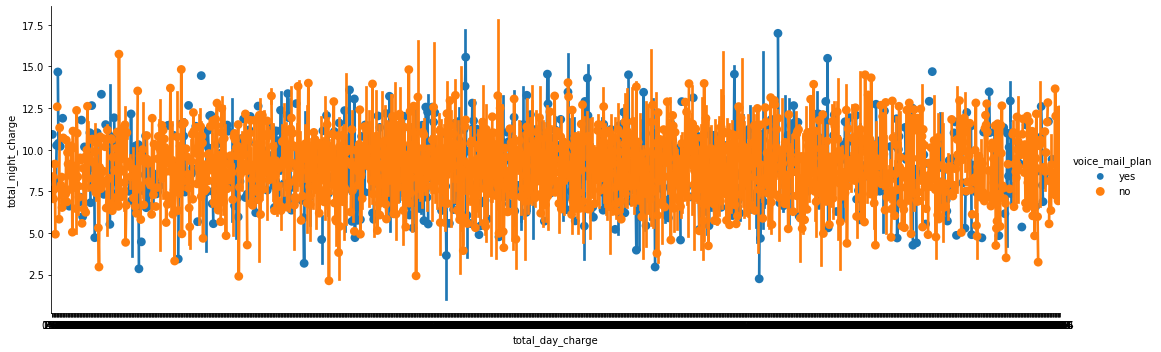

In [56]:
sns.catplot('total_day_charge','total_night_charge',hue='voice_mail_plan',aspect=3,data=df,kind='point')

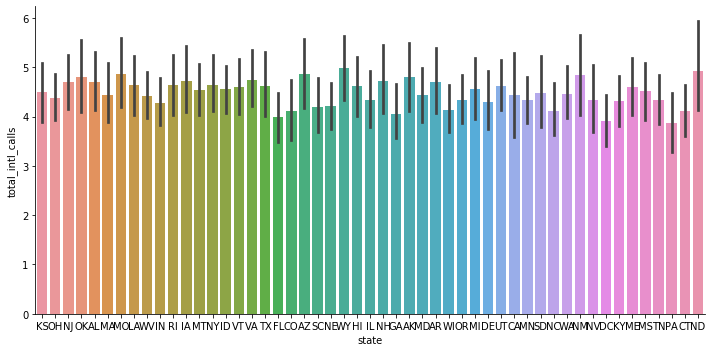

In [59]:
sns.catplot('state','total_intl_calls',data=df,aspect=2,kind='bar')

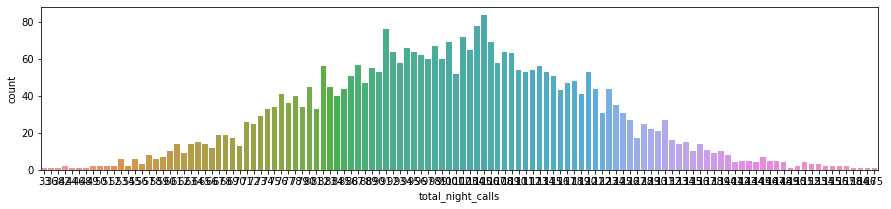

In [63]:
plt.figure(figsize=(15,3))
sns.countplot('total_night_calls',data=df)

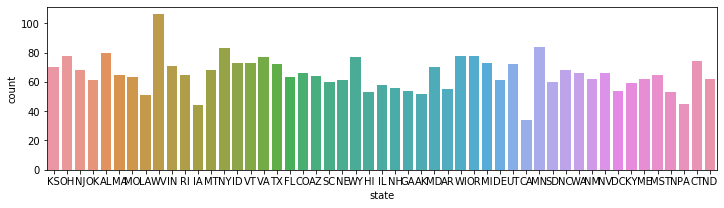

In [66]:
plt.figure(figsize=(12,3))
sns.countplot(df['state'])

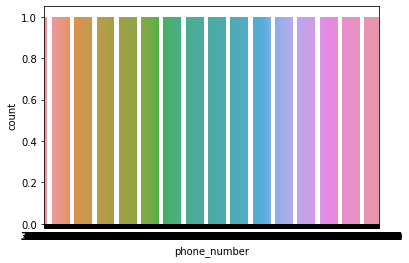

In [67]:
sns.countplot(df['phone_number'])

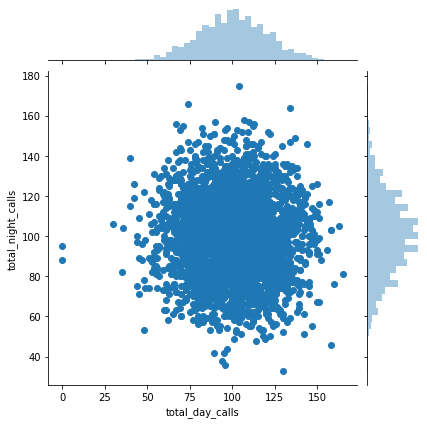

In [69]:
sns.jointplot('total_day_calls','total_night_calls',height=6,ratio=5,space=.2,data=df,kind='scatter')

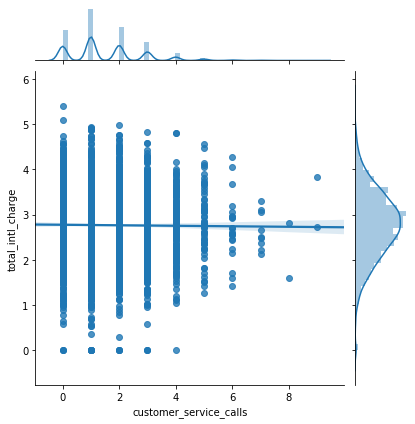

In [70]:
sns.jointplot('customer_service_calls','total_intl_charge',height=6,ratio=5,space=.2,data=df,kind='reg')

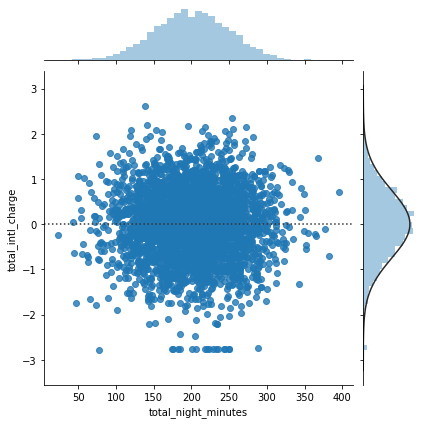

In [71]:
sns.jointplot('total_night_minutes','total_intl_charge',height=6,ratio=5,space=.2,data=df,kind='reside')

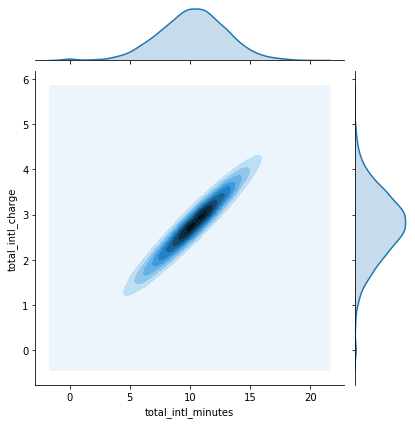

In [72]:
sns.jointplot('total_intl_minutes','total_intl_charge',height=6,ratio=5,space=.2,data=df,kind='kde')

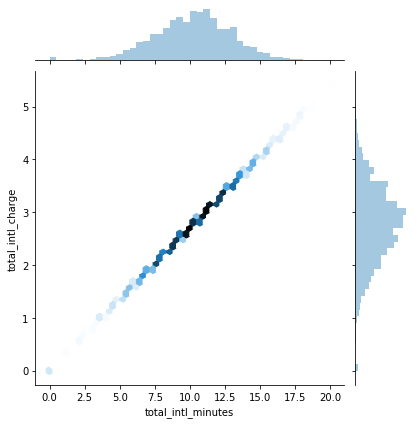

In [73]:
sns.jointplot('total_intl_minutes','total_intl_charge',height=6,ratio=5,space=.2,data=df,kind='hex')

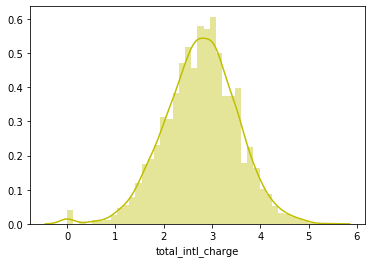

In [74]:
sns.distplot(df['total_intl_charge'],color='y')

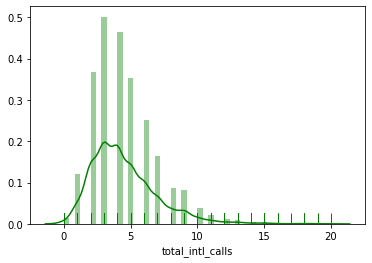

In [77]:
sns.distplot(df['total_intl_calls'],color='g',rug=True)

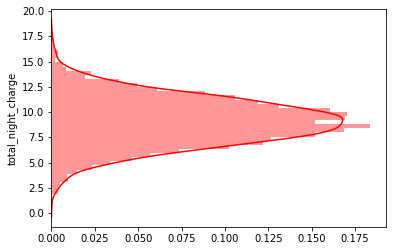

In [79]:
sns.distplot(df['total_night_charge'],color='r',vertical=True)

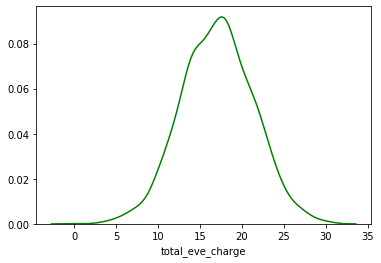

In [80]:
sns.distplot(df['total_eve_charge'],color='g',hist=False)

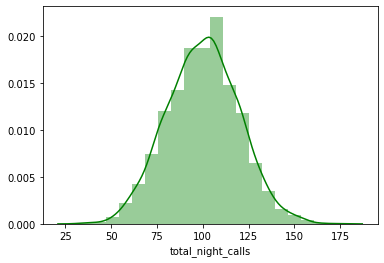

In [11]:
sns.distplot(df['total_night_calls'],bins=20,color='g')

In [12]:
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

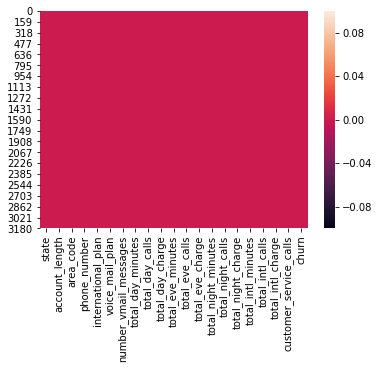

In [13]:
sns.heatmap(df.isnull())

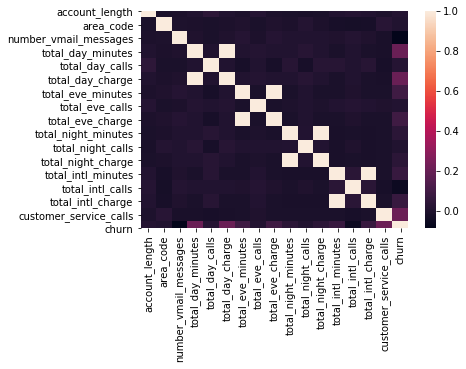

In [14]:
sns.heatmap(df.corr())

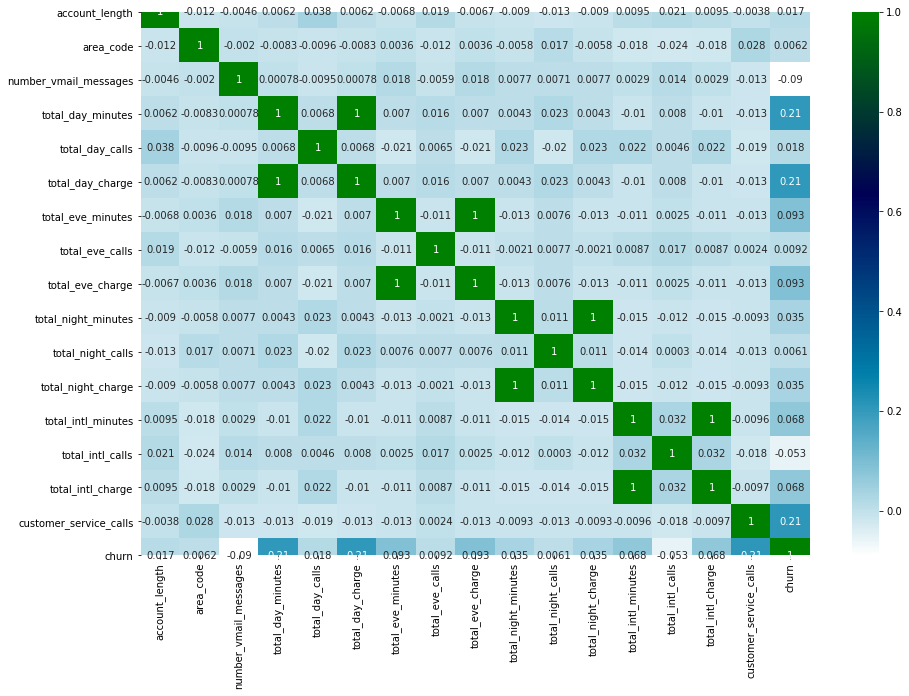

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='ocean_r',annot=True)

In [16]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
len(df['state'].unique())

51

In [18]:
df['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [20]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [22]:
le=LabelEncoder()

In [23]:
df['state']=le.fit_transform(df['state'])
df['international_plan']=le.fit_transform(df['international_plan'])
df['voice_mail_plan']=le.fit_transform(df['voice_mail_plan'])
df.drop('phone_number',axis=1,inplace=True)

In [24]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
x=df.drop('churn',axis=1)
x.shape

(3333, 19)

In [26]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [27]:
y=df['churn']=df['churn'].astype(int)
y.shape
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [28]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [29]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]

In [33]:
max_acc_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accu_values=accuracy_score(y_test,predm)
        print('Accuracy score corresponing to random state',r_state,'is:',accu_values)
        if accu_values>max_acc_score:
            max_acc_score=accu_values
            final_state=r_state
            final_model=m
print()
print()
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_acc_score,'and models is',final_model)

Accuracy score corresponing to random state 40 is: 0.90125
Accuracy score corresponing to random state 40 is: 0.91875
Accuracy score corresponing to random state 40 is: 0.945
Accuracy score corresponing to random state 40 is: 0.91875
Accuracy score corresponing to random state 40 is: 0.87
Accuracy score corresponing to random state 41 is: 0.87375
Accuracy score corresponing to random state 41 is: 0.905
Accuracy score corresponing to random state 41 is: 0.93375
Accuracy score corresponing to random state 41 is: 0.91
Accuracy score corresponing to random state 41 is: 0.84
Accuracy score corresponing to random state 42 is: 0.89125
Accuracy score corresponing to random state 42 is: 0.9175
Accuracy score corresponing to random state 42 is: 0.935
Accuracy score corresponing to random state 42 is: 0.925
Accuracy score corresponing to random state 42 is: 0.84875
Accuracy score corresponing to random state 43 is: 0.91375
Accuracy score corresponing to random state 43 is: 0.92
Accuracy score cor

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=43)

In [35]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.945
[[694   7]
 [ 37  62]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       701
           1       0.90      0.63      0.74        99

    accuracy                           0.94       800
   macro avg       0.92      0.81      0.85       800
weighted avg       0.94      0.94      0.94       800



In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameter={'criterion':('gini','entropy'),'n_estimators':range(10,50)}
grid=GridSearchCV(rfc,param_grid=parameter)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [39]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=43)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.96125
[[696   5]
 [ 26  73]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       701
           1       0.94      0.74      0.82        99

    accuracy                           0.96       800
   macro avg       0.95      0.87      0.90       800
weighted avg       0.96      0.96      0.96       800



In [40]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95352324 0.95202399 0.96101949 0.95495495 0.95645646]
0.9555956256106182
0.003086136105954674


In [41]:
from sklearn.externals import joblib

In [42]:
joblib.dump(rfc,'CustomerChurn.obj')

['CustomerChurn.obj']